# Band inversion at the Brillouin zone boundary of finie Su-Schrieffer-Heeger (SSH) chains
The band inversion is given as the expectation value

\begin{equation}
\left\langle \psi_\text{i}\right|\mathbb{1} \otimes \sigma_\text{x} | \psi_\text{i} \rangle \;,
\end{equation}

where $\sigma_\text{x}$ is the first Pauli matrix and $| \psi_\text{i} \rangle$ is the $i^\text{th}$ eigenstate of the SSH-Hamiltonian $\hat{H}$. The Hamiltonian is [1]

\begin{equation}
\hat{H} = \alpha \sum_{m=1}^{N}( |m,B\rangle\langle m,A| + |m,A\rangle \langle m,B|) + \beta \sum_{m=1}^{N-1}( |m+1,A\rangle\langle m,B| + |m,B\rangle\langle m+1,A|) \; .
\end{equation}

which can be written as a matrix:

\begin{equation}
H = \begin{pmatrix}0 & \alpha & 0 & 0 & 0 & 0 & 0 & 0\\\alpha & 0 & \beta & 0 & 0 & 0 & 0 & 0\\0 & \beta & 0 & \alpha & 0 & 0 & 0 & 0\\0 & 0 & \alpha & 0 & \beta & 0 & 0 & 0\\0 & 0 & 0 & \beta & 0 & \alpha & 0 & 0\\0 & 0 & 0 & 0 & \alpha & 0 & \beta & 0\\0 & 0 & 0 & 0 & 0 & \beta & 0 & \alpha\\0 & 0 & 0 & 0 & 0 & 0 & \alpha & 0\end{pmatrix} \; .
\end{equation}

using the base

\begin{equation}
|1,A\rangle=\begin{pmatrix} 1\\0\\0\\0\\ \vdots \end{pmatrix},\;\;\; |1,B\rangle=\begin{pmatrix} 0\\1\\0\\0\\ \vdots \end{pmatrix},\;\;\; |2,A\rangle=\begin{pmatrix} 0\\0\\1\\0\\ \vdots \end{pmatrix} ,\;\;\; \ldots \;\;\; .
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


def symmetry(state):
    n = len(state)//2
    operator = np.kron(np.identity(n),np.array([[0,1],[1,0]]))
    return np.dot(np.conjugate(state.T),np.dot(operator,state))

## topologically trivial case

In [2]:
v = 1
w = 0.4
N = 20

#populate H:
H = np.zeros(( 2*N,2*N ),dtype=np.float64)
for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
H[-1,0] = 0
H[0,-1] = 0

eigensystem = np.linalg.eigh(H)

cmap = matplotlib.cm.get_cmap('PiYG')
bandsymms = []
for k in range(2*N):
    bandsymms.append(symmetry(eigensystem[1].T[k]))
    energies = eigensystem[0]
    K = [n/(N-1)*np.pi for n in range(N)] + [(N-n-1)/(N-1)*np.pi for n in range(N)]

### plot the trivial case

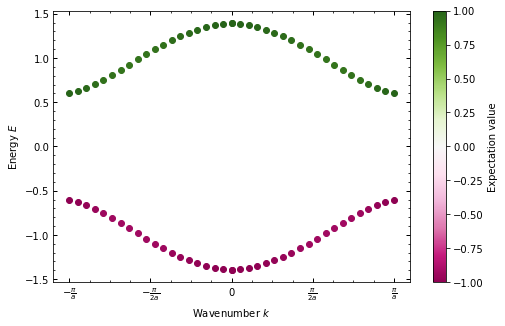

In [3]:

fig, ax = plt.subplots(figsize=(8,5))
for k in range(2*N):
    ax.plot([K[k]],[energies[k]],color=cmap(bandsymms[k]/2+0.5),marker="o")
    ax.plot([-K[k]],[energies[k]],color=cmap(bandsymms[k]/2+0.5),marker="o")
plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(-1,1),cmap=cmap),label="Expectation value")
plt.xticks(np.linspace(-np.pi,np.pi,5),labels=["$-\\frac{\\pi}{a}$","$-\\frac{\\pi}{2a}$","$0$","$\\frac{\\pi}{2a}$","$\\frac{\\pi}{a}$"])
ax.set_xlabel("Wavenumber $k$")
ax.set_ylabel("Energy $E$")
ax.minorticks_on()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.tick_params(which='major', width=1.00,length=4,direction="in")
ax.tick_params(which='minor', width=0.75,length=2,direction="in")
plt.show()

## topologically non-trivial case

In [4]:
v = 0.4
w = 1
N = 20

#populate H:
H = np.zeros(( 2*N,2*N ),dtype=np.float64)
for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
H[-1,0] = 0
H[0,-1] = 0

eigensystem = np.linalg.eigh(H)

cmap = matplotlib.cm.get_cmap('PiYG')
bandsymms = []
for k in range(2*N):
    bandsymms.append(symmetry(eigensystem[1].T[k]))
    energies = eigensystem[0]
    K = [n/(N-1)*np.pi for n in range(N)] + [(N-n-1)/(N-1)*np.pi for n in range(N)]

### plot the non-trivial case

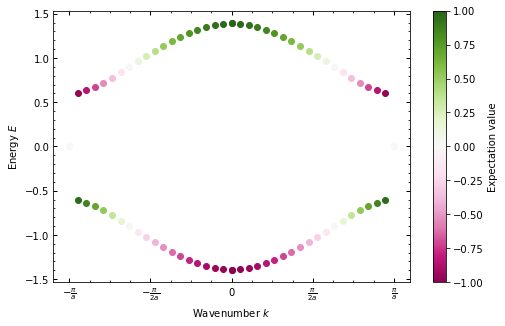

In [5]:
# plot
fig, ax = plt.subplots(figsize=(8,5))
for k in range(2*N):
    ax.plot([K[k]],[energies[k]],color=cmap(bandsymms[k]/2+0.5),marker="o")
    ax.plot([-K[k]],[energies[k]],color=cmap(bandsymms[k]/2+0.5),marker="o")
plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(-1,1),cmap=cmap),label="Expectation value")
plt.xticks(np.linspace(-np.pi,np.pi,5),labels=["$-\\frac{\\pi}{a}$","$-\\frac{\\pi}{2a}$","$0$","$\\frac{\\pi}{2a}$","$\\frac{\\pi}{a}$"])
ax.set_xlabel("Wavenumber $k$")
ax.set_ylabel("Energy $E$")
ax.minorticks_on()
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.tick_params(which='major', width=1.00,length=4,direction="in")
ax.tick_params(which='minor', width=0.75,length=2,direction="in")
plt.show()

# References
[1] J. K. Asbóth, L. Oroszlány, and A. Pályi, *A Short Course on Topological Insulators.* Budapest, HU: Springer Cham, Sep 2017. [Online]. Available: https://arxiv.org/pdf/1509.02295.pdf